In [23]:
!pip install pgmpy

Subiectul 1, **a**

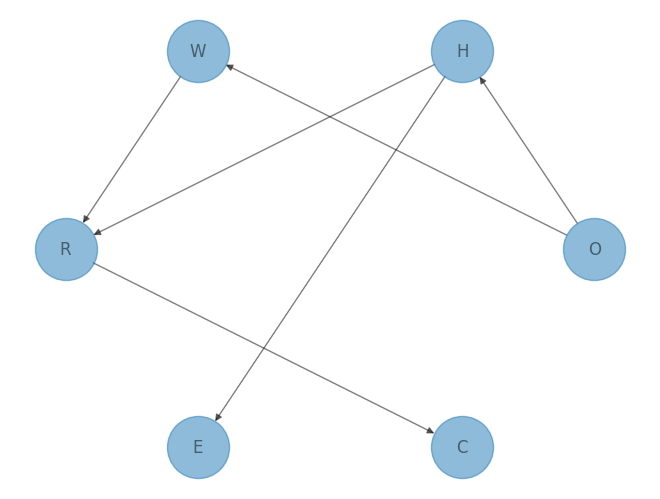

In [24]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

problem_model = DiscreteBayesianNetwork([('O', 'H'), ('O', 'W'), ('H', 'R'),
                                ('W', 'R'), ('H', 'E'), ('R', 'C')])

pos = nx.circular_layout(problem_model)
nx.draw(problem_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)
plt.show()

In [25]:
CPD_O= TabularCPD(variable='O', variable_card=2, values=[[0.3], [0.7]]) # P(o=cold), P(o=mild)
print(CPD_O)

CPD_H = TabularCPD(variable='H',
                   variable_card=2,
                   values=[[0.1, 0.8], # P(H=0 | O=0), P(H=0 | O=1)
                           [0.9, 0.2]],  # P(H=1 | O=0), P(H=1 | O=1)
                   evidence=['O'],
                   evidence_card=[2])
print(CPD_H)

CPD_W = TabularCPD(variable='W',
                   variable_card=2,
                   values=[[0.9, 0.4], # P(W=0 | O=0), P(W=0 | O=1)
                           [0.1, 0.6]],  # P(W=1 | O=0), P(W=1 | O=1)
                   evidence=['O'],
                   evidence_card=[2])
print(CPD_W)

CPD_R = TabularCPD(variable='R',
                   variable_card=2,
                   values=[[0.5, 0.7, 0.1, 0.4],
                           [0.5, 0.3, 0.9, 0.6]],
                   evidence=['H', 'W'],
                   evidence_card=[2, 2])

print(CPD_R)

CPD_E = TabularCPD(variable='E',
                   variable_card=2,
                   values=[[0.8, 0.2], # P(E=0 | H=0), P(E=0 | H=1)
                           [0.2, 0.8]],  # P(E=1 | H=0), P(E=1 | H=1)
                   evidence=['H'],
                   evidence_card=[2])
print(CPD_E)

CPD_C = TabularCPD(variable='C',
                   variable_card=2,
                   values=[[0.6, 0.15],
                           [0.4, 0.85]],
                   evidence=['R'],
                   evidence_card=[2])
print(CPD_C)


+------+-----+
| O(0) | 0.3 |
+------+-----+
| O(1) | 0.7 |
+------+-----+
+------+------+------+
| O    | O(0) | O(1) |
+------+------+------+
| H(0) | 0.1  | 0.8  |
+------+------+------+
| H(1) | 0.9  | 0.2  |
+------+------+------+
+------+------+------+
| O    | O(0) | O(1) |
+------+------+------+
| W(0) | 0.9  | 0.4  |
+------+------+------+
| W(1) | 0.1  | 0.6  |
+------+------+------+
+------+------+------+------+------+
| H    | H(0) | H(0) | H(1) | H(1) |
+------+------+------+------+------+
| W    | W(0) | W(1) | W(0) | W(1) |
+------+------+------+------+------+
| R(0) | 0.5  | 0.7  | 0.1  | 0.4  |
+------+------+------+------+------+
| R(1) | 0.5  | 0.3  | 0.9  | 0.6  |
+------+------+------+------+------+
+------+------+------+
| H    | H(0) | H(1) |
+------+------+------+
| E(0) | 0.8  | 0.2  |
+------+------+------+
| E(1) | 0.2  | 0.8  |
+------+------+------+
+------+------+------+
| R    | R(0) | R(1) |
+------+------+------+
| C(0) | 0.6  | 0.15 |
+------+------+--

In [26]:
problem_model.add_cpds(CPD_O, CPD_H, CPD_W, CPD_R, CPD_E, CPD_C)
problem_model.get_cpds()

[<TabularCPD representing P(O:2) at 0x7d23667c93a0>,
 <TabularCPD representing P(H:2 | O:2) at 0x7d236e2f6480>,
 <TabularCPD representing P(W:2 | O:2) at 0x7d236d795340>,
 <TabularCPD representing P(R:2 | H:2, W:2) at 0x7d2367acf6e0>,
 <TabularCPD representing P(E:2 | H:2) at 0x7d23671e8200>,
 <TabularCPD representing P(C:2 | R:2) at 0x7d2366c4c2c0>]

In [27]:
problem_model.check_model()

problem_model.local_independencies(['O', 'H', 'W', 'R', 'E', 'C'])

(H ⟂ W | O)
(W ⟂ H, E | O)
(R ⟂ O, E | W, H)
(E ⟂ W, O, C, R | H)
(C ⟂ W, O, H, E | R)

In [28]:
from pgmpy.inference import VariableElimination

inference_engine = VariableElimination(problem_model)

phi_H = inference_engine.query(['H'], evidence={'C':1})
print(phi_H)

phi_E = inference_engine.query(['E'], evidence={'C':1})
print(phi_E)

posterior_p = inference_engine.query(['H', 'W'], evidence={'C':1})
print(posterior_p)

+------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.5177 |
+------+----------+
| H(1) |   0.4823 |
+------+----------+
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.5106 |
+------+----------+
| E(1) |   0.4894 |
+------+----------+
+------+------+------------+
| H    | W    |   phi(H,W) |
+======+======+============+
| H(0) | W(0) |     0.2401 |
+------+------+------------+
| H(0) | W(1) |     0.2776 |
+------+------+------------+
| H(1) | W(0) |     0.3684 |
+------+------+------------+
| H(1) | W(1) |     0.1138 |
+------+------+------------+


Subiectul 2

In [29]:
!pip install hmmlearn

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [31]:
states = ["Walking", "Running", "Resting"]
observations = ["Low", "Medium", "High"]

state_probability = np.array([0.4, 0.3, 0.3])

transition_probability = np.array([
    [0.6, 0.3, 0.1],
    [0.2, 0.7, 0.1],
    [0.3, 0.2, 0.5]
])

emission_probability = np.array([
    [0.1, 0.7, 0.2],
    [0.05, 0.25, 0.7],
    [0.8, 0.15, 0.05]
])

model = hmm.CategoricalHMM(n_components=len(states))
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([1, 2, 0]).reshape(-1, 1)
observations_sequence

log_prob = model.score(observations_sequence)
prob = np.exp(log_prob)

print(f"Log-probabilitatea observatiilor: {log_prob:.10f}")
print(f"Probabilitatea observatiilor: {prob:.10f}")

log_prob_viterbi, hidden_states = model.decode(observations_sequence, algorithm="viterbi")

prob_viterbi = np.exp(log_prob_viterbi)

print("\nMost likely hidden states:", hidden_states)

most_probable_sequence = [states[state] for state in hidden_states]
print(f"[{', '.join(most_probable_sequence)}]")

Log-probabilitatea observatiilor: -3.8576650370
Probabilitatea observatiilor: 0.0211172500

Most likely hidden states: [0 1 2]
[Walking, Running, Resting]
